In [56]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from tkinter import filedialog
from tkinter import Tk

---
# **Importando uma base de dados**

In [3]:
# Seleciona um arquivo
root = Tk()
root.withdraw()
file_path = filedialog.askopenfilename(title="Escolha um arquivo CSV", filetypes=(("CSV files", "*.csv"), ("All files", "*.*"))) #Tipo de arquivo

if file_path:
    df = pd.read_csv(file_path, sep=';') #Sempre verificar o separador
    print(f"Arquivo '{file_path}' carregado com sucesso!")
else:
    print("Nenhum arquivo selecionado.")

Arquivo 'D:/GitHub/ml-playground/EDA/Teste/MATCHING_PRODUTO.csv' carregado com sucesso!


---
# **Visualizando os Dados**

In [5]:
df.head(10)

,SUGGESTED_TITLE,CRAWLEDNAME
0,Sprite Original 330ML,COCA COLA O SPRITE 330ML ORIGINAL O ZERO EN LA...
1,Coca-Cola Sin Azúcar 600ML,COCA-COLA SIN AZÚCAR COCA-COLA SIN AZÚCAR 600ML
2,Coca-Cola Sin Azúcar 600ML,COCA-COLA SIN AZÚCAR 600ML
3,Coca-Cola Sin Azúcar 600ML,COCA-COLA SIN AZÚCAR 600ML
4,Coca-Cola Sin Azúcar 600ML,COCA-COLA ZERO 600ML COCA-COLA SIN AZÚCAR DE 6...
5,Coca-Cola Sin Azúcar 300ML,COCA-COLA SIN AZÚCAR 300ML
6,Coca-Cola Sin Azúcar 300ML,COCA-COLA SIN AZÚCAR 300ML
7,Coca-Cola Sin Azúcar 300ML,GASEOSA COCA-COLA SIN AZÚCAR 300ML
8,Coca-Cola Original 3L,COCA-COLA SABOR ORIGINAL 3L GASEOSA COCA-COLA ...
9,Coca-Cola Original 3L,COCA COLA SABOR ORIGINAL 3L COCA COLA SABOR OR...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SUGGESTED_TITLE  806 non-null    object
 1   CRAWLEDNAME      806 non-null    object
dtypes: object(2)
memory usage: 12.7+ KB


In [8]:
df.tail(10)

,SUGGESTED_TITLE,CRAWLEDNAME
796,Coca-Cola Original 250ML,MINI BANDERILLAS X2 2 SALCHICHAS TIPO AMERICA...
797,Coca-Cola Original 250ML,PEPITO DE CARNE O POLLO AL GRILL + COCA-COLA O...
798,Coca-Cola Original 250ML,SUPER COMBO HAMBURGUESA AMERICANA CARNE HAMBUR...
799,Coca-Cola Original 250ML,HAMBURGUESA DOBLE EN COMBO ARMADA EN PAN ARTES...
800,Coca-Cola Original 250ML,HAMBURGUESA CON POLLO EN COMBO ARMADA EN PAN A...
801,Coca-Cola Original 250ML,HAMBURGUESA CON TOCINETA EN COMBO ARMADA EN PA...
802,Coca-Cola Original 250ML,SUPER COMBO HAMBURGUESA PARRILLERA ESCOGE UNA ...
803,Del Valle Frutal Mango 200ML,DEL VALLE FRUTAL MANGO 200ML
804,Del Valle Frutal Mango 200ML,CAJA JUGO DEL VALLE FRUTAL MANGO 200ML
805,Del Valle Frutal Mango 946ML,JUGO DEL VALLE FRUTAL MANGO TB946ML JUGO DEL V...


In [9]:
linhas, colunas = df.shape
print(f"Linhas: {linhas:,}\nColunas:{colunas:,}")

Linhas: 806
Colunas:2


Problema: para um treinamento de modelo, essa quantidade de registros pode ser pouco. e poucos dados podem causar underfitting.

---
# **Data Preparation**

- Alterar nomes de colunas
- Verificar se os tipos de cada variável estão corretos

In [10]:
df.columns

Index(['SUGGESTED_TITLE', 'CRAWLEDNAME'], dtype='object')

In [76]:
df = df.rename(columns={'SUGGESTED_TITLE': 'titulo_sugerido', 'CRAWLEDNAME' : 'nome_original'})

---
# **EDA**

**1. Verificando os tipos de dados**

In [77]:
contagem_tipos = df.dtypes.value_counts().to_dict()
resumo = ", ".join([f"{contagem} colunas do tipo {tipo}" for tipo, contagem in contagem_tipos.items()])
print(resumo)

2 colunas do tipo object


In [78]:
print("Mais detalhes sobre as colunas:\n")

informacoes_colunas = pd.DataFrame({
    'Tipo de Dado': df.dtypes,
    'Contagem nao nulos': df.count(),
    'Contagem nulos': df.isnull().sum(),
    'Porcentagem nulos': (df.isnull().sum() / len(df) * 100).round(2),
    'Valores unicos': df.nunique(),
    'Porcentagem cardinalidade' : (df.nunique() / len(df) *100).round(2)
})

print(informacoes_colunas)


Mais detalhes sobre as colunas:

                Tipo de Dado  Contagem nao nulos  Contagem nulos  \
titulo_sugerido       object                 806               0   
nome_original         object                 806               0   

                 Porcentagem nulos  Valores unicos  Porcentagem cardinalidade  
titulo_sugerido                0.0              57                       7.07  
nome_original                  0.0             792                      98.26  


In [79]:
porcentagem_nulos_alta = informacoes_colunas[informacoes_colunas['Porcentagem nulos'] > 25].index.tolist() # Porcentagem de valores Nulos
if porcentagem_nulos_alta:
    print(f"Colunas com altas taxas de valores nulos: {', '.join(porcentagem_nulos_alta)}")

In [80]:
valor_unico = informacoes_colunas[informacoes_colunas['Valores unicos'] == 1].index.tolist()
if valor_unico:
    print(f"Colunas com um único valor: {', '.join(valor_unico)}")

In [81]:
porcentagem_cardinalidade_alta = informacoes_colunas[informacoes_colunas['Porcentagem cardinalidade'] > 90].index.tolist()
if porcentagem_cardinalidade_alta:
    print(f"Colunas com altas taxas de cardinalidade: {', '.join(porcentagem_cardinalidade_alta)}")

Colunas com altas taxas de cardinalidade: nome_original


---
**2. Analizando os valores nulos**

In [82]:
total_celulas = np.prod(df.shape)
total_nulos = df.isnull().sum().sum()
porcentagem_nulos = (total_nulos/total_celulas) * 100

print(f"Visão geral: {total_nulos} valores nulos de {total_celulas} células, sendo {porcentagem_nulos:.2f}% do total.")

Visão geral: 0 valores nulos de 1612 células, sendo 0.00% do total.


In [83]:
if total_nulos > 0:
    #plotar um gráfico de nulos
    plt.figure(figsize=(12,6))
    ax = sns.heatmap(df.isnull(), cbar = False, cmap = "viridis", yticklabels = False)
    plt.title("Mapa de Valores nulos")
    plt.tight_layout()
    plt.show()

    colunas_nulos = df.columns[df.isnull().any()].tolist()
    print(f"Colunas com dados nulos: {', '.join(colunas_nulos)}")

    dados_nulos = pd.DataFrame({
        'Contagem de nulos': df.isnull().sum(),
        'Porcentagem de nulos': (df.isnull().sum() / len(df) * 100).round(2)
    }).sort_values('Porcentagem de nulos', ascending=False)

    dados_nulos = dados_nulos[dados_nulos['Contagem de nulos'] > 0]

    plt.figure(figsize = (12,6))
    ax = dados_nulos['Porcentagem de nulos'].plot(kind='bar')
    plt.title('Porcentagem de valores nulos por Coluna')
    plt.xlabel('Colunas')
    plt.ylabel('Porcentagem de nulos')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    display(dados_nulos)

else:
    print(f"Não foram encontrados valores nulos!")

Não foram encontrados valores nulos!


---
**3. Verificando se existe registros duplicados**

In [84]:
contagem_duplicados =  df.duplicated().sum()

if contagem_duplicados > 0:
    porcentagem_duplicados = (contagem_duplicados / len(df)) * 100
    print(f"Foi encontrado {contagem_duplicados} registros duplicados, o que corresponde a {porcentagem_duplicados:.2f} do total de registros")
else: 
    print("Não foi encontrado registros duplicados no dataset.")

Não foi encontrado registros duplicados no dataset.


---
**4. Inferindo tipos de dados**

In [85]:
def inferir_tipos_colunas(df):
    col_numericas = []
    col_categorias = []
    col_datetime = []
    col_text = []
    col_id = []

    for col in df.columns:
        if pd.api.types.is_datetime64_any_dtype(df[col]):
            col_datetime.append(col)
        elif pd.api.types.is_numeric_dtype(df[col]):
            if("id" in col.lower() or col.lower().endswith("_id") and df[col].nunique() > 0.8 *len(df)):
                col_id.append(col)
            else: 
                col_numericas.append(col)
        elif pd.api.types.is_object_dtype(df[col]):
            amostra = df[col].dropna().sample(min(10, len(df[col].dropna()))).astype(str)
            avg_len = amostra.str.len().mean()
            max_len = amostra.str.len().max()
            unique_ratio = df[col].nunique() / len(df[col].dropna())
            if ('id' in col.lower() or col.lower().endswith('_id')) and unique_ratio > 0.8:
                    col_id.append(col)
            elif avg_len > 50 or (max_len > 100 and unique_ratio > 0.9):
                col_text.append(col)
            else:
                col_categorias.append(col)

    return {
        'numerica': col_numericas,
        'categorica': col_categorias, #onehot Encoding
        'datetime': col_datetime,
        'textual': col_text, #tokenizacao
        'id': col_id
    }

tipos_colunas = inferir_tipos_colunas(df)
for tipo, cols in tipos_colunas.items():
    if cols:
        print(f"Coluna {tipo.capitalize()} ({len(cols)}): {', '.join(cols)}")

Coluna Categorica (1): titulo_sugerido
Coluna Textual (1): nome_original


---
**5. Verificando inconsistências ou possíveis problemas**

In [86]:
def verificar_consistencia_dados(df):
    problemas = []

    for col in tipos_colunas['numerica']:
        if df[col].dtype in [np.int64, np.int32, np.float64, np.float32]:
            if df[col].isnull().sum() > 0.5 * len(df):
                continue
            # verifica outliers usando o método IQR
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR

            outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
            porcentagem_outliers = len(outliers) / len(df) * 100
        
            if porcentagem_outliers > 5:
                problemas.append(f"Coluna '{col}' tem {porcentagem_outliers:.2f}% de possíveis outliers\nLimite: {limite_inferior:.2f} a {limite_superior:.2f}" )

            indicadores_quantidade = ['qtd', 'quantidade', 'preco', 'ano', 'peso', 'altura'] #alguns indicadores
            if any(indicador in col.lower() for indicador in indicadores_quantidade):
                valores_negativos = (df[col] < 0).sum()
                if valores_negativos > 0:
                    problemas.append(f"Coluna '{col}' contém {valores_negativos} valores negativos")
    
    for col in tipos_colunas['categorica']:
        if df[col].isnull().sum() > 0.5 * len(df):
            continue
            
        if df[col].nunique() > 1:
            qtd_valores = df[col].value_counts()
            valores_raros = qtd_valores[qtd_valores < len(df) * 0.01]
            if len(valores_raros) > 0 and len(valores_raros) < 0.5 * df[col].nunique():
                problemas.append(f"A coluna '{col}' tem {len(valores_raros)} categoria(s) raras (cada uma com menos de 1% dos dados), que talvez precisem ser agrupadas.")

        if df[col].dtype == object:
            valores = df[col].dropna().astype(str)
            valores_baixos = valores.str.lower()
            casos_duplicados = valores_baixos.value_counts()[valores_baixos.value_counts() > 1].index
            if len(casos_duplicados) > 0:
                problemas_amostra = []
                for valor in casos_duplicados[:3]:
                    variacoes = valores[valores_baixos == valor].unique()
                    if len(variacoes) > 1:
                        problemas_amostra.append(f"'{variacoes[0]}' x '{variacoes[1]}'")
                if problemas_amostra:
                    problemas.append(f"A coluna '{col}' possui inconsistências, como: {', '.join(problemas_amostra)}")

    for col in tipos_colunas['datetime']:
        if pd.Timestamp.now() < df[col].max():
            futuro = (df[col] > pd.Timestamp.now()).sum()
            if futuro > 0:
                problemas.append(f"A coluna '{col}' contém {futuro} datas no futuro, isso pode indicar erros nas datas.")

    return problemas

problemas = verificar_consistencia_dados(df)

if problemas:
    print("Existem potenciais PROBLEMAS!\n")
    for i, problema in enumerate(problemas, 1):
        print(f"{i}. {problema}\n")
else: 
    print("Não foram identificados possíveis problemas")

Não foram identificados possíveis problemas


---
**6. Variaveis Numéricas**

In [87]:
if tipos_colunas['numerica']:
    estatisticas = df[tipos_colunas['numerica']].describe().T
    estatisticas['range'] = estatisticas['max'] - estatisticas['min']
    estatisticas['coeficiente_variacao'] = (estatisticas['std']/estatisticas['mean'] *100).round(2)
    estatisticas = estatisticas.sort_values('coeficiente_variacao', ascending = False)

    print("Resumo estatístico das colunas Numéricas")
    display(estatisticas)

    #Identificando variáveis com altas variações
    if len(estatisticas) > 0:
        colunas_alta_variacao = estatisticas.nlargest(min(3, len(estatisticas)), 'coeficiente_variacao').index.tolist()
        print(f"Colunas Numericas com variações altas:  {', '.join(colunas_alta_variacao)}")

else:
    print("Não foi identificado variaveis numéricas no dataset!")

Não foi identificado variaveis numéricas no dataset!


- Plotando essas Variações

In [88]:
colunas_numericas = min(len(tipos_colunas['numerica']), 16)

if colunas_numericas > 0:
    colunas_plot = tipos_colunas['numerica'][:colunas_numericas]
    n_colunas = min(3, colunas_numericas)
    n_linhas = (colunas_numericas + n_colunas -1)//n_colunas

    fig, axes = plt.subplots(n_linhas, n_colunas, figsize = (15, 3*n_linhas))
    if n_linhas == 1 and n_colunas == 1:
        axes = np.array([axes]) 
        axes = axes.flatten()

    for i, col in enumerate(colunas_plot):
        if df[col].isnull().sum() > 0.5 * len(df):
            continue
        ax = axes[i]
        sns.histplot(df[col].dropna(), kde=True, ax=ax)
        ax.set_title(f"Distribuicao de {col}")
        ax.set_xlabel(col)
        ax.tick_params(axis='x', rotation=45)

    for j in range(i+1, len(axes)):
            axes[j].set_visible(False)   

    plt.tight_layout()
    plt.show() 

    #identificar outliers

    fig, axes = plt.subplots(n_linhas, n_colunas, figsize=(15, 3*n_linhas))
    if n_linhas == 1 and n_colunas == 1:
        axes = np.array([axes])
    axes = axes.flatten()

    for i, col in enumerate(colunas_plot):
        if df[col].isnull().sum() > 0.5 * len(df):
            continue
        ax = axes[i]
        sns.boxplot(x=df[col].dropna(), ax=ax)
        ax.set_title(f'Boxplot de {col}')
        ax.set_xlabel(col)

    for j in range(i+1, len(axes)):
            axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()       

else: 
     print("Não foi identificado variaveis numéricas no dataset!")

Não foi identificado variaveis numéricas no dataset!


Em geral os outliers aparecem em variáveis numéricas, entao possivelmente não há outliers pois não temos variáveis numéricas nesse dataset.

---
**7. Variáveis Categóricas**

In [89]:
if tipos_colunas['categorica']:
    for col in tipos_colunas['categorica'][:min(10, len(tipos_colunas['categorica']))]:
        if df[col].nunique() > 50 or df[col].isnull().sum() > 0.5 * len(df):  # categorias demais ou mais de 50% nulos
            print(f"A coluna '{col}' possui muitas categorias ou valores nulos para uma análise.\n")
            continue

        c_vezes = df[col].value_counts().head(10)
        c_porcentagem = (c_vezes / len(df) * 100).round(2)
        print(f"Top valores da coluna '{col}' (entre {df[col].nunique()} valores diferentes)")

        c_resumo = pd.DataFrame({
            'Frequência': c_vezes,
            'Porcentagem': c_porcentagem
        })
        display(c_resumo)

        plt.figure(figsize=(10, 5))
        sns.barplot(x=c_vezes.index, y=c_vezes.values)
        plt.title(f'Distribuição de {col}')
        plt.xlabel(col)
        plt.ylabel('Frequência')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

else:
    print("Não foram identificadas variáveis categóricas no dataset.")


A coluna 'titulo_sugerido' possui muitas categorias ou valores nulos para uma análise.



In [91]:
for i in df['titulo_sugerido'].unique():
    print(i)

Sprite Original 330ML
Coca-Cola Sin Azúcar 600ML
Coca-Cola Sin Azúcar 300ML
Coca-Cola Original 3L
Coca-Cola Sin Azúcar 400ML
Del Valle Frutal Mora 500ML
Del Valle Frutal Mandarina 200ML
Fuze Tea Manzana Limonaria 400ML
Brisa Sin Gas 6L
Brisa Sin Gas 600ML
Brisa Saborizada Manzana 600ML
Fuze Tea Limón 400ML
Quatro Original 400ML
Coca-Cola Café 235ML
Coca-Cola Original 600ML
Brisa Con Gas 600ML
Brisa Sin Gas 280ML
Del Valle Frutal Mango 500ML
Fuze Tea Durazno 1.2L
Fuze Tea Durazno 400ML
Kola Román Original 1.5L
Del Valle Fresh Citrus 1.5L
Sprite Original 400ML
Coca-Cola Original 330ML
Coca-Cola Sin Azúcar 235ML
Brisa Con Gas 280ML
Del Valle Frutal Mora 200ML
Del Valle Fresh Mandarina 2.5L
Quatro Sin Azucar 400ML
Sprite Original 1.75L
Coca-Cola Original 235ML
Coca-Cola Original 1.75L
Del Valle Fresh Mandarina 1.5L
Coca-Cola Original 300ML
Quatro Original 250ML
Sprite Sin Azucar 400ML
Kola Román Original 400ML
Coca-Cola Original 2.5L
Coca-Cola Sin Azúcar 250ML
Del Valle Frutal Mora 946ML
D

---
**8. Datetime**

In [92]:
if tipos_colunas['datetime']:
    for col in tipos_colunas['datetime']:
        if df[col].isnull().sum()>0.5 *len(df):
            print(f"A coluna {col} possui muitos valores nulos para uma análise.")
            continue

        min_data = df[col].min()
        max_data = df[col].max()
        periodo = (max_data-min_data).days

        print(f"'{col}' vai de {min_data} até {max_data} ({periodo} dias)")

        plt.figure(figsize=(15,10))

        #Subplot da distribuicao por data
        plt.subplot(2,2,1)
        df[col].dt.date.value_count().sort_index().plot()
        plt.title(f"Distribuição ao longo do tempo")
        plt.xlabel("Data")
        plt.ylabel('Frequência')

        #Subplot da distribuicao por mes
        plt.subplot(2,2,2)
        freq_mes = df[col].dt.month.value_counts().sort_index()
        meses = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Abr', 5: 'Mai', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'}
        freq_mes.index = freq_mes.index.map(meses)
        freq_mes.plot(kind='bar')
        plt.title("Distribuição por Mês")
        plt.xlabel("Mês")
        plt.ylabel("Frequência")

        #Subplot de Distribuição por dias da Semana
        plt.subplot(2,2,3)
        freq_dias_semana = df[col].dt.dayofweek.value_counts().sort_index()
        dias = {0: 'Seg', 1: 'Ter', 2: 'Qua', 3: 'Qui', 4: 'Sex', 5: 'Sáb', 6: 'Dom'}
        freq_dias_semana.index = freq_dias_semana.index.map(dias)
        freq_dias_semana.plot(kind='bar')
        plt.title("Distribuição por Dia da Semana")
        plt.xlabel("Dia da Semana")
        plt.ylabel('Frequência')

        #Subplot de distribuição por hora caso tenha horário
        plt.subplot(2, 2, 4)
        if (df[col].dt.hour != 0).any():
            df[col].dt.hour.value_counts().sort_index().plot(kind='bar')
            plt.title('Distribuição por Hora do Dia')
            plt.xlabel('Hora')
            plt.ylabel('Frequência')
        else:
            plt.text(0.5,0.5, "Não foi encontrado o horário na coluna!", horizontalalignment='center', verticalalignment='center')
            plt.axis('off')

        plt.tight_layout()
        plt.show()
    
else:
    print("Não foram encontradas variáveis Datetime no dataset")



Não foram encontradas variáveis Datetime no dataset


---
**9. Relações entre variáveis numéricas**

In [93]:
if len(tipos_colunas['numerica']) > 1:
    correlacao = df[tipos_colunas['numerica']].corr()

    #Heatmap
    plt.figure(figsize=(12,10))
    mask = np.triu(np.ones_like(correlacao, dtype=bool), k=1)
    cmap = sns.diverging_palette(230, 20, as_cmap=True)  
    sns.heatmap(correlacao, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, annot=True, fmt=".2f", square=True, linewidths=.5)  
    plt.title('Correlação entre Variáveis Numéricas')  
    plt.tight_layout() 
    plt.show()

    correlacoes_fortes = []
    for i in range(len(correlacao.columns)):
        for j in range(i + 1, len(correlacao.columns)):
            valor_corr = correlacao.iloc[i, j]
            if abs(valor_corr) > 0.7:  # Limite para correlação forte
                coluna1 = correlacao.columns[i]
                coluna2 = correlacao.columns[j]
                correlacoes_fortes.append((coluna1, coluna2, valor_corr))

    for col1, col2, corr in correlacoes_fortes:
        print(f"As colunas '{col1}' e '{coluna2}' tem correlação de {corr:.2f}")

    if correlacoes_fortes:
        print("Pares fortemente correlacionados de variáveis numéricas (correlação > 0.7):\n")
        for coluna1, coluna2, valor_corr in sorted(correlacoes_fortes, key=lambda x: abs(x[2]), reverse=True):
            print(f"{coluna1} e {coluna2}: {valor_corr:.3f}")
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=df[coluna1], y=df[coluna2], alpha=0.6)
            plt.title(f'Gráfico de Dispersão: {coluna1} x {coluna2} (Correlação: {valor_corr:.3f})')
            plt.xlabel(coluna1)
            plt.ylabel(coluna2)
            plt.tight_layout()
            plt.show()
    else:
        print("Nenhuma correlação forte (correlação > 0.7) encontrada entre variáveis numéricas.")

else:
    print("Não foram encontradas variáveis numéricas suficiente para análise, precisa de pelo menos 2 variáveis numéricas")

Não foram encontradas variáveis numéricas suficiente para análise, precisa de pelo menos 2 variáveis numéricas


---
**10. Relações entre variáveis categoricas e numéricas**

In [94]:
from scipy import stats #para o teste ANOVA

In [46]:
if tipos_colunas['categorica'] and tipos_colunas['numerica']:
    cat_cols = tipos_colunas['categorica']
    num_cols = tipos_colunas['numerica']

    for cat_col in cat_cols:
        if df[cat_col].nunique() > 10 or df[cat_col].isnull().sum() > 0.5 * len(df):
            print(f"Pulando '{cat_col}'")
            continue
        for num_col in num_cols:
            if df[num_col].isnull().sum() > 0.5 * len(df):
                print(f"Pulando '{num_col}'")
                continue

            print(f"\nAnalisando '{cat_col}' × '{num_col}':\n")
            #Box plot para visualizar a distribuicao por categoria
            plt.figure(figsize=(12,6))

            plt.subplot(1,2,1)
            sns.boxplot(x=cat_col, y=num_col, data=df)
            plt.title(f"Distribuição de '{num_col}' por '{cat_col}'")
            plt.xlabel(cat_col)
            plt.ylabel(num_col)
            plt.xticks(rotation=45, ha='right')

            plt.subplot(1, 2, 2)
            medias = df.groupby(cat_col)[num_col].mean().sort_values(ascending=False)
            sns.barplot(x=medias.index, y=medias.values)
            plt.title(f"Média de '{num_col}' por '{cat_col}'")
            plt.xlabel(cat_col)
            plt.ylabel(f"Média de {num_col}")
            plt.xticks(rotation=45, ha='right')

            plt.tight_layout()
            plt.show()

            #teste ANOVA
            try:
                # Obtém categorias válidas na coluna categórica, removendo valores ausentes
                categorias = df[cat_col].dropna().unique()
                if len(categorias) > 1:  # Precisa de pelo menos 2 categorias para ANOVA
                    # Agrupa os valores numéricos por categoria e remove grupos vazios
                    grupos = [df[df[cat_col] == cat][num_col].dropna() for cat in categorias]
                    grupos = [grupo for grupo in grupos if len(grupo) > 0]
                    
                    if len(grupos) > 1:  # Precisa de pelo menos 2 grupos não vazios
                        estatistica_f, p_valor = stats.f_oneway(*grupos)
                        if p_valor < 0.05:
                            print(f"✅ Relação significativa: a média de '{num_col}' varia significativamente entre as categorias de '{cat_col}' (p-valor: {p_valor:.5f}).")
                        else:
                            print(f"❌ Nenhuma relação significativa: a média de '{num_col}' não varia significativamente entre as categorias de '{cat_col}' (p-valor: {p_valor:.5f}).")
            except Exception as e:
                print(f"Não foi possível realizar o teste estatístico: {str(e)}")

else:
    print("É necessário ter variáveis categóricas e numéricas para esta análise")

É necessário ter variáveis categóricas e numéricas para esta análise


---
**11. Vizualizando pares de features**

In [95]:
if len(tipos_colunas['numerica']) >1:
    colunas_num = tipos_colunas['numerica'][::min(4, len(tipos_colunas['numerica']))]
    if tipos_colunas['categorica']:
        for cat_col in tipos_colunas['categorica']:
            if 2 <= df[cat_col].nunique() <= 5:
                hue_col = cat_col
                break
        else:
            hue_col = None
    else:
        hue_col = None

    print("Pair Plot de Features Numéricas Selecionadas:")
    tamanho_amostra = min(5000, len(df))
    sample_df = df.sample(tamanho_amostra) if len(df) > tamanho_amostra else df

    plt.figure(figsize=(12, 10))
    plot_df = sample_df[colunas_num].copy()

    if hue_col:
        plot_df[hue_col] = sample_df[hue_col]
        g = sns.pairplot(plot_df, hue=hue_col, corner=True, diag_kind="kde", plot_kws={"alpha": 0.6}, palette="pastel")
        g.fig.set_size_inches(6, 5)
        g.fig.suptitle(f'Pair Plot colorido por {hue_col}', y=1.02)
    else:
        g = sns.pairplot(plot_df,corner=True,diag_kind="kde",plot_kws={"alpha": 0.6}, palette="pastel")
        g.fig.set_size_inches(6, 5)
        g.fig.suptitle('Pair Plot de Features Numéricas Selecionadas', y=1.02)
    
    plt.tight_layout()
    plt.show()

    print("Insights do Pair Plot:\n- A diagonal mostra a distribuição de cada variável\n- Os gráficos fora da diagonal mostram as relações entre pares de variáveis\n- Observe padrões, clusters ou tendências nos scatter plots")

else:
    print("Variáveis numéricas insuficientes para análise de pair plot (é preciso pelo menos 2).")

Variáveis numéricas insuficientes para análise de pair plot (é preciso pelo menos 2).


---
**12. Pandas Profiling Report**

In [96]:
from ydata_profiling import ProfileReport

In [97]:
profile = ProfileReport(df, title='Relatório Pandas Profiling', explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 58.19it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print("\n\nArquivo HTML")
profile.to_file("relatorio.html")

---
# **Top 10**

    - Produtos mais comuns

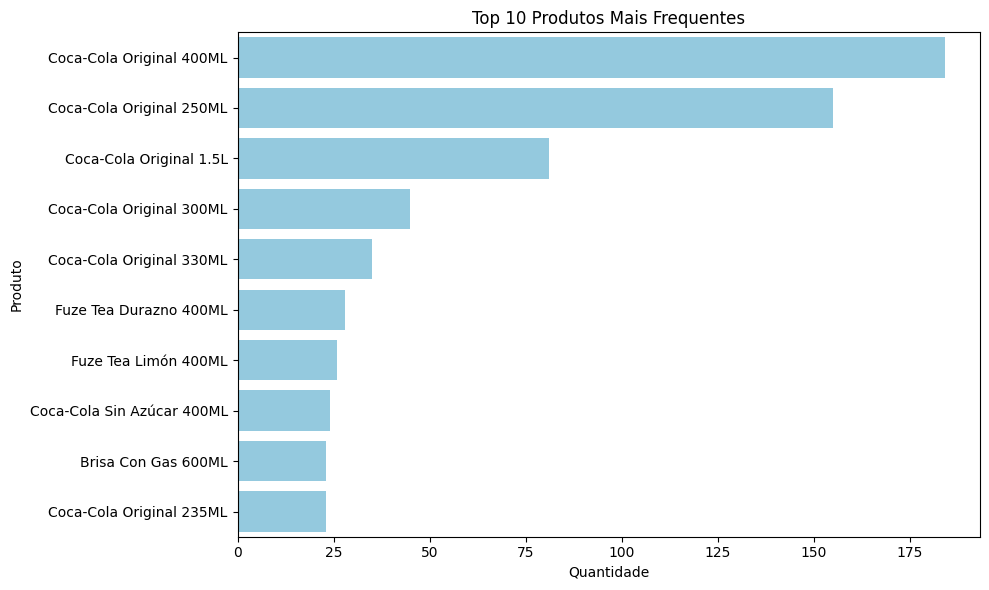

In [98]:
top_10 = df['titulo_sugerido'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_10.values, y=top_10.index, color='skyblue')

plt.title('Top 10 Produtos Mais Frequentes')
plt.xlabel('Quantidade')
plt.ylabel('Produto')
plt.tight_layout()
plt.show()

---
### **Verificando qual a distribuicao entre os titulos (unica variavel categorica)**

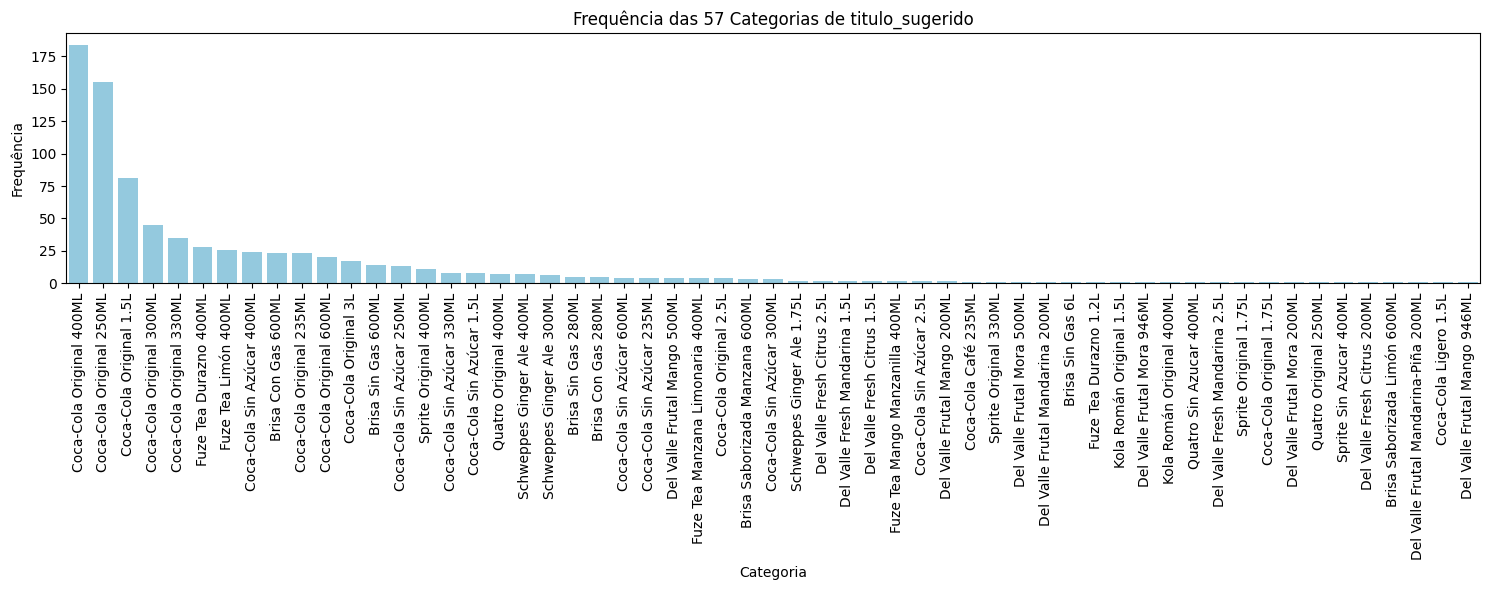

In [99]:
plt.figure(figsize=(15,6))
top57 = df['titulo_sugerido'].value_counts().sort_values(ascending=False)

sns.barplot(x=top57.index, y=top57.values, color="skyblue")
plt.xticks(rotation=90)
plt.title('Frequência das 57 Categorias de titulo_sugerido')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


Resposta: Existem variáveis com um número muito diferente de registros em comparação a outros, e isso é ruim para um treinamento de modelo, pois em modelos de classificação, a classificação pode ser tendenciosa para as categorias que tem mais registros.

---
### **hipotese:** categorias não agrupadas, com isso, quero verificar se existem duas categorias que deveriam estar agrupadas em uma única, mas que apresentam erros de formatação ou escrita.

In [108]:
for i in df['titulo_sugerido'].unique():
    if 'sprite' in i.lower():
        print(i)

Sprite Original 330ML
Sprite Original 400ML
Sprite Original 1.75L
Sprite Sin Azucar 400ML


In [102]:
for i in df['titulo_sugerido'].unique():
    if 'coca' in i.lower():
        print(i)

Coca-Cola Sin Azúcar 600ML
Coca-Cola Sin Azúcar 300ML
Coca-Cola Original 3L
Coca-Cola Sin Azúcar 400ML
Coca-Cola Café 235ML
Coca-Cola Original 600ML
Coca-Cola Original 330ML
Coca-Cola Sin Azúcar 235ML
Coca-Cola Original 235ML
Coca-Cola Original 1.75L
Coca-Cola Original 300ML
Coca-Cola Original 2.5L
Coca-Cola Sin Azúcar 250ML
Coca-Cola Original 1.5L
Coca-Cola Sin Azúcar 2.5L
Coca-Cola Sin Azúcar 1.5L
Coca-Cola Sin Azúcar 330ML
Coca-Cola Original 400ML
Coca-Cola Ligero 1.5L
Coca-Cola Original 250ML


In [ ]:
for i in df['titulo_sugerido'].unique():
    if 'coca' and '600' in i.lower():
        print(i)

Coca-Cola Sin Azúcar 600ML
Brisa Sin Gas 600ML
Brisa Saborizada Manzana 600ML
Coca-Cola Original 600ML
Brisa Con Gas 600ML
Brisa Saborizada Limón 600ML


In [109]:
for i in df['titulo_sugerido'].unique():
    if 'valle' in i.lower():
        print(i)

Del Valle Frutal Mora 500ML
Del Valle Frutal Mandarina 200ML
Del Valle Frutal Mango 500ML
Del Valle Fresh Citrus 1.5L
Del Valle Frutal Mora 200ML
Del Valle Fresh Mandarina 2.5L
Del Valle Fresh Mandarina 1.5L
Del Valle Frutal Mora 946ML
Del Valle Fresh Citrus 2.5L
Del Valle Fresh Citrus 200ML
Del Valle Frutal Mandarina-Piña 200ML
Del Valle Frutal Mango 200ML
Del Valle Frutal Mango 946ML


In [106]:
for i in df['titulo_sugerido']:
    if 'valle' in i.lower():
        print(i)

Del Valle Frutal Mora 500ML
Del Valle Frutal Mandarina 200ML
Del Valle Frutal Mango 500ML
Del Valle Frutal Mango 500ML
Del Valle Frutal Mango 500ML
Del Valle Frutal Mango 500ML
Del Valle Fresh Citrus 1.5L
Del Valle Fresh Citrus 1.5L
Del Valle Frutal Mora 200ML
Del Valle Fresh Mandarina 2.5L
Del Valle Fresh Mandarina 1.5L
Del Valle Fresh Mandarina 1.5L
Del Valle Frutal Mora 946ML
Del Valle Fresh Citrus 2.5L
Del Valle Fresh Citrus 2.5L
Del Valle Fresh Citrus 200ML
Del Valle Frutal Mandarina-Piña 200ML
Del Valle Frutal Mango 200ML
Del Valle Frutal Mango 200ML
Del Valle Frutal Mango 946ML


Resposta: está tudo correto

---
### **Para cada categoria mostra os nomes mais frequentes**
objetivo dessa análise é entender se existem valores errados no dataset que podem confundir o modelo. Ex:

| titulo\_sugerido | nome\_original  |
| ---------------- | --------------- |
| coca-cola 200ml  | coca-cola 200ml |
| coca-cola 200ml  | coca-cola 600ml |
| coca-cola 200ml  | del valle 200ml |


In [148]:
agrupado = df.groupby(['titulo_sugerido', 'nome_original']).size().reset_index(name='frequencia')

categorias = df['titulo_sugerido'].unique()

for cat in categorias:
    print(f'\n🌸 Categoria: "{cat}" 🌸')
    
    dados_cat = agrupado[agrupado['titulo_sugerido'] == cat]
    dados_cat = dados_cat.sort_values(by='frequencia', ascending=False)
    
    primeira_palavra = cat.split()[0].lower()

    dados_cat['contém_palavra'] = dados_cat['nome_original'].str.lower().str.contains(primeira_palavra)
    
    qtd_com_palavra = dados_cat['contém_palavra'].sum()
    total_registros = len(dados_cat)
    
    print(f'Total registros na categoria: {total_registros}')
    print(f'Registros com a palavra "{primeira_palavra}" em nome_original: {qtd_com_palavra}')

    '''for _, row in dados_cat.iterrows():
        if row['contém_palavra']:
            contem = 'Sim'
        else:
            contem = 'Não'

        print(f"   ↪ {row['nome_original']} | Frequência: {row['frequencia']} | Contém '{primeira_palavra}'? {contem}")'''


🌸 Categoria: "Sprite Original 330ML" 🌸
Total registros na categoria: 1
Registros com a palavra "sprite" em nome_original: 1

🌸 Categoria: "Coca-Cola Sin Azúcar 600ML" 🌸
Total registros na categoria: 4
Registros com a palavra "coca-cola" em nome_original: 4

🌸 Categoria: "Coca-Cola Sin Azúcar 300ML" 🌸
Total registros na categoria: 3
Registros com a palavra "coca-cola" em nome_original: 3

🌸 Categoria: "Coca-Cola Original 3L" 🌸
Total registros na categoria: 17
Registros com a palavra "coca-cola" em nome_original: 10

🌸 Categoria: "Coca-Cola Sin Azúcar 400ML" 🌸
Total registros na categoria: 24
Registros com a palavra "coca-cola" em nome_original: 23

🌸 Categoria: "Del Valle Frutal Mora 500ML" 🌸
Total registros na categoria: 1
Registros com a palavra "del" em nome_original: 1

🌸 Categoria: "Del Valle Frutal Mandarina 200ML" 🌸
Total registros na categoria: 1
Registros com a palavra "del" em nome_original: 1

🌸 Categoria: "Fuze Tea Manzana Limonaria 400ML" 🌸
Total registros na categoria: 4


---
Analisando categorias especificas que nao tiveram o resultado esperado na análise anterior

In [149]:
for cat in categorias:   
    dados_cat = agrupado[agrupado['titulo_sugerido'] == cat]
    dados_cat = dados_cat.sort_values(by='frequencia', ascending=False)
    
    primeira_palavra = cat.split()[0].lower()

    dados_cat['contém_palavra'] = dados_cat['nome_original'].str.lower().str.contains(primeira_palavra)
    
    qtd_com_palavra = dados_cat['contém_palavra'].sum()
    total_registros = len(dados_cat)
    
    # Só imprime os detalhes quando for essa categoria específica
    if cat == "Coca-Cola Original 1.5L": #FILTRO
        print(f'\n🌸 Categoria: "{cat}" 🌸')
        print(f'Total registros na categoria: {total_registros}')
        print(f'Registros com a palavra "{primeira_palavra}" em nome_original: {qtd_com_palavra}')
        for _, row in dados_cat.iterrows():
            if row['contém_palavra']:
                contem = 'Sim'
            else:
                contem = 'Não'
        

            print(f"   ↪ {row['nome_original']} | Frequência: {row['frequencia']} | Contém '{primeira_palavra}'? {contem}")



🌸 Categoria: "Coca-Cola Original 1.5L" 🌸
Total registros na categoria: 81
Registros com a palavra "coca-cola" em nome_original: 41
   ↪ ARROZCHUZZ FAMILIAR (4 PERSONAS) ARROZ, POLLO, BUTIFARRA, CHORIZO Y TOCINETA, MEZCLA DE VEGETALES, SALSA BBQ, SALSA SOYA, ACOMPAÑAMIENTO (PAPA FRANCESA, PATACÓN Ó BOLLO)  COCA-COLA ORIGINAL 1.5L. | Frequência: 1 | Contém 'coca-cola'? Sim
   ↪ COCA  COLA 1.5LT SABOR ORIGINAL  | Frequência: 1 | Contém 'coca-cola'? Não
   ↪ COCA COLA 1.5 LITROS COCA COLA ORIGINAL, COCA COLA CERO 1.5L | Frequência: 1 | Contém 'coca-cola'? Não
   ↪ COCA COLA 1.5L COCA COLA ORIGINAL 1.5 LITROS | Frequência: 1 | Contém 'coca-cola'? Não
   ↪ COCA COLA 1.5L COCA COLA SABOR ORIGINAL LITRO Y MEDIO. | Frequência: 1 | Contém 'coca-cola'? Não
   ↪ COCA COLA 1.5L SABOR ORIGINAL  | Frequência: 1 | Contém 'coca-cola'? Não
   ↪ COCA COLA 1.5LT COCA-COLA 1.5 SABOR ORIGINAL | Frequência: 1 | Contém 'coca-cola'? Sim
   ↪ COCA COLA 1.5LT SABOR ORIGINAL | Frequência: 1 | Contém 'coca-cola'?

Resposta: Existem sim categorias que foram classificadas mesmo quando o nome original não bate exatamente com o esperado, mas isso não quer dizer que esteja errado, geralmente é só uma diferença na forma de escrever. Exemplo: em vez de “cola-cola” com hífen, pode estar escrito “coca cola” sem o hífen.

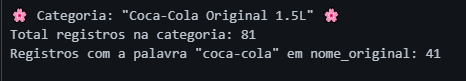

Por isso, os números parecem bem diferentes, mas olhando os dados com calma, dá pra ver que são só variações na escrita, e não erros de classificação.